In [ ]:
# Importing necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Define constants
batch_size = 32
epochs = 2
input_shape = (256, 256, 3)  # Adjust dimensions based on your images
num_classes = 3  # Number of disease categories (change as per your dataset)

In [ ]:
# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # num_classes is the number of disease classes
])

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,             # Rescale the pixel values to [0, 1]
    shear_range=0.2,            # Randomly apply shearing
    zoom_range=0.2,             # Randomly zoom in/out
    horizontal_flip=True        # Randomly flip images horizontally
)

In [ ]:
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Load dataset and prepare generators
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/wheat/wheat_leaf',  # Replace with your dataset path
    target_size=(256, 256),      # Resize images to match the input shape
    batch_size=batch_size,
    class_mode='categorical'     # For multi-class classification
)

Found 407 images belonging to 3 classes.


In [ ]:
valid_generator = valid_datagen.flow_from_directory(
    '/content/drive/MyDrive/wheat/wheat_leaf',  # Replace with the actual path
    target_size=(256, 256),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 407 images belonging to 3 classes.


In [ ]:
test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/wheat/wheat_leaf',  # Replace with the actual path
    target_size=(256, 256),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 407 images belonging to 3 classes.


In [ ]:
# Check if the dataset is loading correctly
print(f'Found {train_generator.samples} images belonging to {train_generator.num_classes} classes.')


Found 407 images belonging to 3 classes.


In [ ]:
# Debugging: Check data generator output
x_batch, y_batch = next(train_generator)
print(f"Batch x shape: {x_batch.shape}")
print(f"Batch y shape: {y_batch.shape}")

# Fit the model
steps_per_epoch = train_generator.samples // batch_size
print(f"Steps per epoch: {steps_per_epoch}")

Batch x shape: (32, 256, 256, 3)
Batch y shape: (32, 3)
Steps per epoch: 12


In [ ]:
# Fit the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // batch_size
)

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 214s 15s/step - accuracy: 0.9671 - loss: 0.1033 - val_accuracy: 0.9870 - val_loss: 0.0400
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 74ms/step - accuracy: 0.9688 - loss: 0.1562 - val_accuracy: 0.9565 - val_loss: 0.0557
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 192s 13s/step - accuracy: 0.9685 - loss: 0.0912 - val_accuracy: 0.9922 - val_loss: 0.0320
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 78ms/step - accuracy: 1.0000 - loss: 0.0317 - val_accuracy: 1.0000 - val_loss: 0.0338
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 194s 13s/step - accuracy: 0.9574 - loss: 0.0919 - val_accuracy: 0.9870 - val_loss: 0.0403
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 75ms/step - accuracy: 0.9688 - loss: 0.0532 - val_accuracy: 0.9565 - val_loss: 0.0418
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 201s 14s/step - accuracy: 0.9369 - loss: 0.1583 - val_accuracy: 0.9896 - val_loss: 0.0407
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 76ms/step - accuracy: 0.9375 - loss: 0.1878 - val_accuracy: 1.0000

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

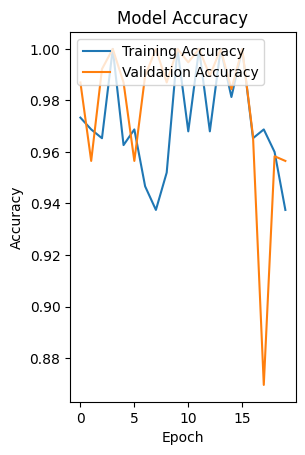

In [ ]:
# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

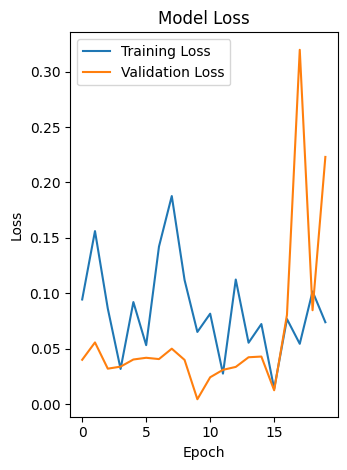

In [ ]:
# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Show the plots
plt.tight_layout()
plt.show()